## **Projeto Final da cadeira de Machine Learning I**
* Nome: Volenei Fuzer
* Base: CancerMama.csv
* Propósito: Criar um modelo de agrupamento.

## **01) importantando as bibliotecas**

In [44]:
import pandas as pd # para criação do data frame
import seaborn as sn # para visualização dos resultados

import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn.cluster import DBSCAN

## **02) Importando e avaliando o dataset**

In [45]:
# importando o dataset

dts_cancer_mama = pd.read_csv("CancerMama.csv")

In [46]:
# avaliando as variáveis do dataset

dts_cancer_mama.head()
    
    # todas as variáveis são numericas exceto a classe. Assim vamos precisar substituir esses valores categóricos por numéricos.

,espessura_massa,uni_tamanho_celula,uni_forma_celula,adesao_marginal,tamanho_celula_epitelial_unica,nucleos_nus,cromatina_branda,nucleolos_normais,mitose,classe
0,5,1,1,1,2,1,3,1,1,benigno
1,5,4,4,5,7,10,3,2,1,benigno
2,3,1,1,1,2,2,3,1,1,benigno
3,6,8,8,1,3,4,3,7,1,benigno
4,4,1,1,3,2,1,3,1,1,benigno


In [47]:
# avaliando os tipos das variáveis:

dts_cancer_mama.info()
# dts_cancer_mama.dtypes
    
    # Aqui podemos observar que vamos trabalhar com 10 variáveis, sendo 9 do tipo inteiro e uma do tipo objeto
    # Aparentemente não existem dados não preenchidos (vazio ou nulos) porém vamos analisar com mais detalher para termos certeza

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
espessura_massa                   569 non-null int64
uni_tamanho_celula                569 non-null int64
uni_forma_celula                  569 non-null int64
adesao_marginal                   569 non-null int64
tamanho_celula_epitelial_unica    569 non-null int64
nucleos_nus                       569 non-null int64
cromatina_branda                  569 non-null int64
nucleolos_normais                 569 non-null int64
mitose                            569 non-null int64
classe                            569 non-null object
dtypes: int64(9), object(1)
memory usage: 44.5+ KB


In [48]:
# Avaliando a existência de dados nulos

print(dts_cancer_mama.isnull().sum())

    # realmente não existem dados nulos porém podem existir algum vazio então vamos avalir

espessura_massa                   0
uni_tamanho_celula                0
uni_forma_celula                  0
adesao_marginal                   0
tamanho_celula_epitelial_unica    0
nucleos_nus                       0
cromatina_branda                  0
nucleolos_normais                 0
mitose                            0
classe                            0
dtype: int64


In [49]:
# Substituindo os valores vazios por NaN

dts_cancer_mama = dts_cancer_mama.apply(lambda x: x.replace('',np.NaN))
dts_cancer_mama.head(50)

,espessura_massa,uni_tamanho_celula,uni_forma_celula,adesao_marginal,tamanho_celula_epitelial_unica,nucleos_nus,cromatina_branda,nucleolos_normais,mitose,classe
0,5,1,1,1,2,1,3,1,1,benigno
1,5,4,4,5,7,10,3,2,1,benigno
2,3,1,1,1,2,2,3,1,1,benigno
3,6,8,8,1,3,4,3,7,1,benigno
4,4,1,1,3,2,1,3,1,1,benigno
5,8,10,10,8,7,10,9,7,1,maligno
6,1,1,1,1,2,10,3,1,1,benigno
7,2,1,2,1,2,1,3,1,1,benigno
8,2,1,1,1,2,1,1,1,5,benigno
9,4,2,1,1,2,1,2,1,1,benigno


In [50]:
# Reavaliando os valores nulos

gp_tratado = dts_cancer_mama.isna().sum().sort_values(ascending=False)
perc_1 = dts_cancer_mama.isna().sum()/dts_cancer_mama.isna().count()*100
perc_2 = perc_1.sort_values(ascending=False)
dados_fatantes = pd.concat([gp_tratado, perc_2], axis=1, keys=['Total', '%'])
dados_fatantes.head(12)

    # Realmente não temos valores nulos

,Total,%
classe,0,0.0
mitose,0,0.0
nucleolos_normais,0,0.0
cromatina_branda,0,0.0
nucleos_nus,0,0.0
tamanho_celula_epitelial_unica,0,0.0
adesao_marginal,0,0.0
uni_forma_celula,0,0.0
uni_tamanho_celula,0,0.0
espessura_massa,0,0.0


In [51]:
# Obtendo informações estatísticas 

dts_cancer_mama.describe()

,espessura_massa,uni_tamanho_celula,uni_forma_celula,adesao_marginal,tamanho_celula_epitelial_unica,nucleos_nus,cromatina_branda,nucleolos_normais,mitose
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,4.539543,3.184534,3.265378,2.845343,3.298770,-2632.518453,3.490334,2.989455,1.637961
std,2.896501,3.002236,2.955935,2.873626,2.304775,16035.653408,2.324925,3.091315,1.773941
min,1.000000,1.000000,1.000000,1.000000,1.000000,-100000.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,8.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


## **03) Avaliar o agrupamento entre as variáveis espessura da massa e tamanho da célula**

Avaliando o dataset, acredito que as variávies citadas possuem maior correação para separação em grupos.

## **04) Criando a clusterização**

In [52]:
# Ajustando a base para deixar todas as variáveis com valores numéricos

dts_cancer_mama['classe'] = dts_cancer_mama['classe'].replace('maligno', 1)
dts_cancer_mama['classe'] = dts_cancer_mama['classe'].replace('benigno', 0)

dts_cancer_mama.head(20)

,espessura_massa,uni_tamanho_celula,uni_forma_celula,adesao_marginal,tamanho_celula_epitelial_unica,nucleos_nus,cromatina_branda,nucleolos_normais,mitose,classe
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
5,8,10,10,8,7,10,9,7,1,1
6,1,1,1,1,2,10,3,1,1,0
7,2,1,2,1,2,1,3,1,1,0
8,2,1,1,1,2,1,1,1,5,0
9,4,2,1,1,2,1,2,1,1,0


In [54]:
# P.S: os comandos comentados abaixo verifiquei, após plotagem dos gráficos, que não faziam diferença na segmentação dos grupos

# Utilizando scaler para melhorar a métrica de dados mais próximos

#padronizando = StandardScaler()
#dts_cancer_mama_tratado = padronizando.fit_transform(dts_cancer_mama).round(3)

In [25]:
# retornando para um dataframe

#dts_cancer_mama_tratado = pd.DataFrame(dts_cancer_mama_tratado)
#dts_cancer_mama_tratado.columns = ['espessura_massa', 'uni_tamanho_celula', 'uni_forma_celula', 'adesao_marginal', 'tamanho_celula_epitelial_unica', 'nucleos_nus', 'cromatina_branda', 'nucleolos_normais', 'mitose', 'classe']

In [53]:
# Visualizando como ficou o dataset

#dts_cancer_mama_tratado.head()

In [55]:
# Separando as variáveis de agrupamento

# dts_cancer_mama_filtrado = dts_cancer_mama_tratado[['espessura_massa', 'uni_tamanho_celula']]

dts_cancer_mama_filtrado = dts_cancer_mama[['espessura_massa', 'uni_tamanho_celula']]

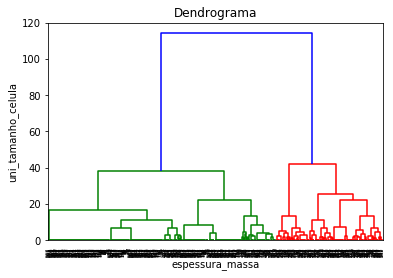

In [56]:
# Prlotando o dendograma para avaliação dos grupos

dendrograma = sch.dendrogram(sch.linkage(dts_cancer_mama_filtrado, method='ward'))
plt.title('Dendrograma')
plt.xlabel('espessura_massa')
plt.ylabel('uni_tamanho_celula')
plt.show()

## **05) Aplicando a clusterização**

In [61]:
# Instanciando

modelo_hierarquico = AgglomerativeClustering(n_clusters = 2, affinity='euclidean', linkage='ward')

In [62]:
# Predição

modelo_hierarquico.fit_predict(dts_cancer_mama_filtrado)

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,

In [63]:
print(modelo_hierarquico.labels_)

[1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0
 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1
 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0
 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1
 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1
 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 0 0 1 1 1 0 1 0 1 0 1 

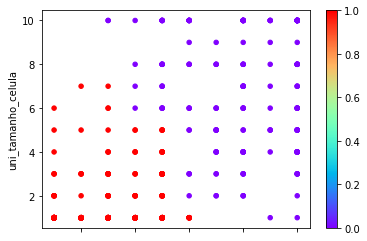

In [64]:
# Plotando o gráfico de dispersão

dts_cancer_mama_filtrado.plot.scatter(x='espessura_massa', y='uni_tamanho_celula', c=modelo_hierarquico.labels_, cmap='rainbow')

## **05.1) Aplicando o Kmins**


In [65]:
dts_cancer_mama_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 2 columns):
espessura_massa       569 non-null int64
uni_tamanho_celula    569 non-null int64
dtypes: int64(2)
memory usage: 9.0 KB


In [66]:
def calculate_wcss(data):
    wcss = []
    for n in range(2, 16):
        kmeans = KMeans(n_clusters = n)
        kmeans.fit(X = data)
        wcss.append(kmeans.inertia_)

    return wcss

Text(0, 0.5, 'WCSS')

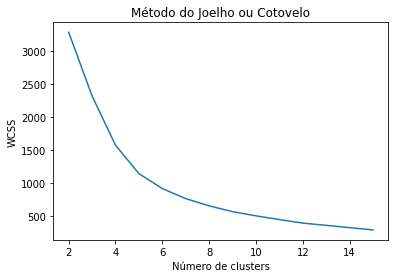

In [67]:
# Soma dos quadrados intra-cluster - WCSS (within- clusters sum-of-squares) 
plt.plot(range(2, 16), calculate_wcss(dts_cancer_mama_filtrado))
plt.title('Método do Joelho ou Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')

In [69]:
soma_dos_quadrados = calculate_wcss(dts_cancer_mama_filtrado)

soma_dos_quadrados

[3280.6482172352908,
 2316.676585460612,
 1573.0000581915297,
 1141.1240671146265,
 899.7747832106941,
 770.3991780105282,
 662.798354537226,
 570.2444544214309,
 493.492300105871,
 430.6955466921537,
 397.85655922026643,
 350.93765581615105,
 319.75378271049266,
 296.72886518192126]

In [70]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [71]:
# obtendo o melhor numero de grupos

numero_de_grupos = optimal_number_of_clusters(soma_dos_quadrados)

numero_de_grupos

6

In [72]:
kmeans = KMeans(n_clusters = numero_de_grupos)

grupos = kmeans.fit_predict(dts_cancer_mama_filtrado)

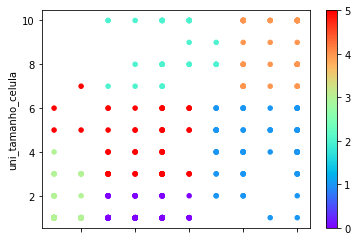

In [74]:
dts_cancer_mama_filtrado.plot.scatter(x='espessura_massa', y='uni_tamanho_celula', c=kmeans.labels_, cmap='rainbow')